In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV,KFold
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import plot_model

In [12]:
import keras
import tensorflow

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [13]:
df = pd.read_csv('Alphabets_data.csv')

In [14]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [16]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [18]:
df.duplicated().any()

True

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
target = df['letter']
feature = df.drop('letter',axis=1)

<Axes: ylabel='Count'>

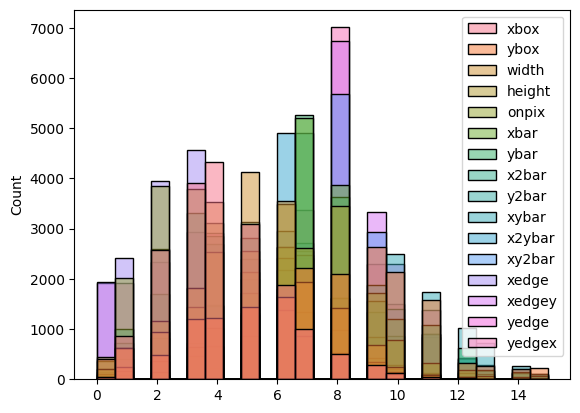

In [21]:
sns.histplot(df,bins=25)

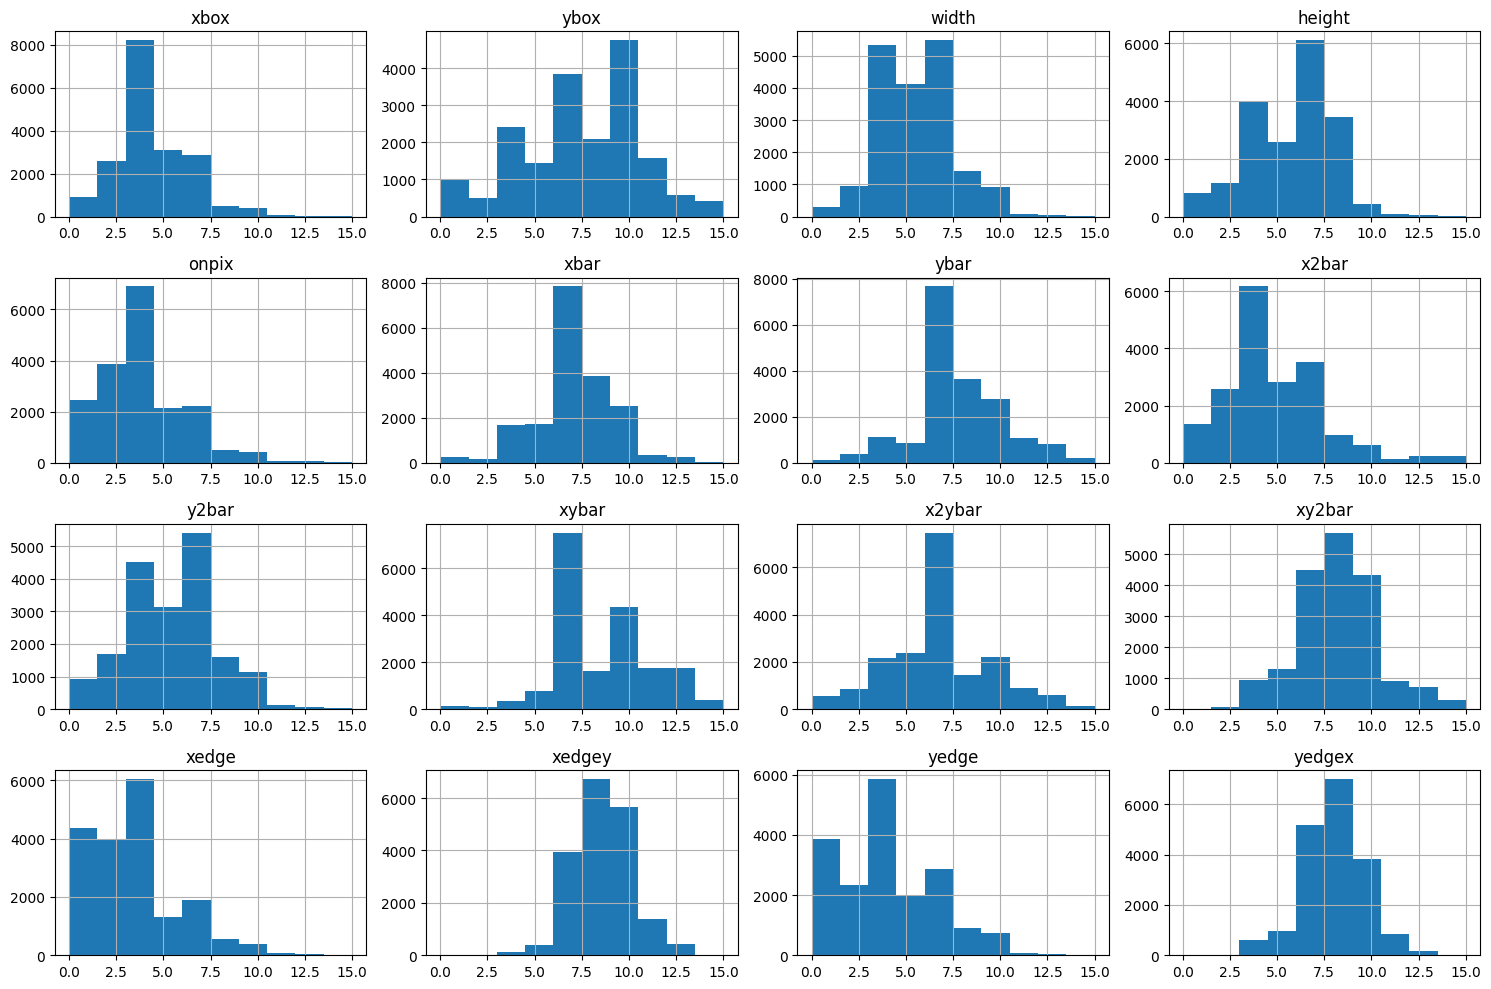

In [22]:
df.drop('letter',axis=1).hist(figsize=(15,10))
plt.tight_layout()

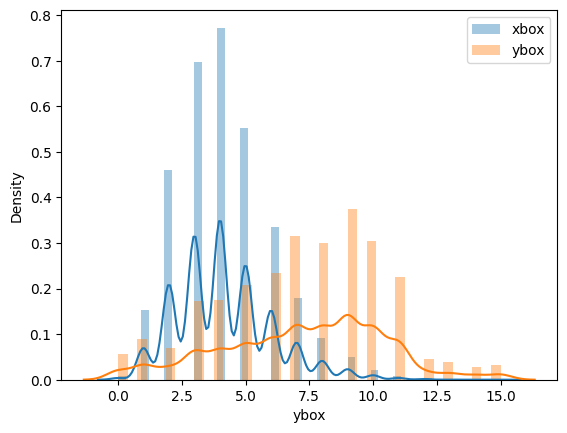

In [23]:
sns.distplot(df['xbox'],label='xbox')
sns.distplot(df['ybox'],label='ybox')
plt.legend()

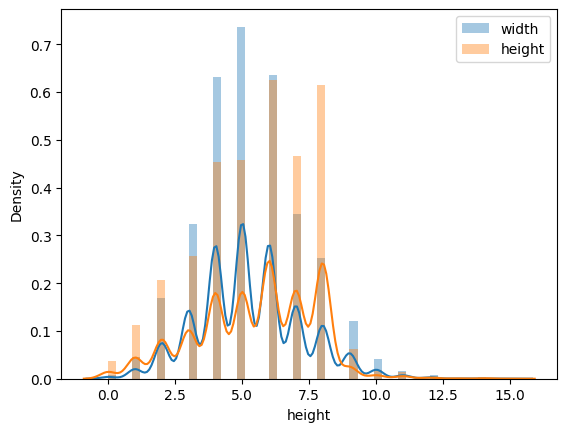

In [24]:
sns.distplot(df['width'],label='width')
sns.distplot(df['height'],label='height')
plt.legend()

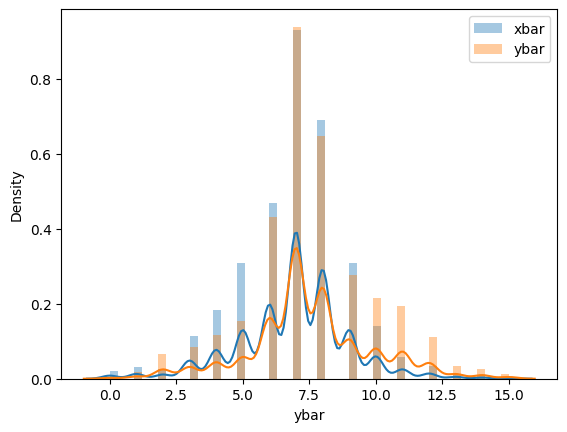

In [25]:
sns.distplot(df['xbar'],label='xbar')
sns.distplot(df['ybar'],label='ybar')
plt.legend()

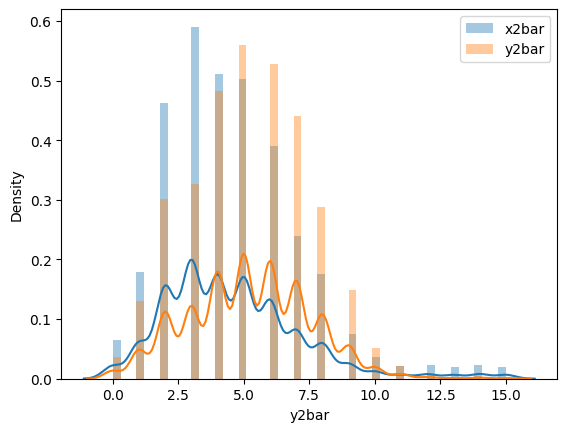

In [26]:
sns.distplot(df['x2bar'],label='x2bar')
sns.distplot(df['y2bar'],label='y2bar')
plt.legend()

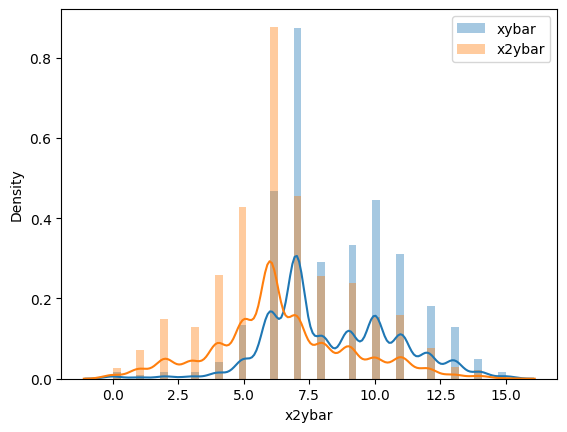

In [27]:
sns.distplot(df['xybar'],label='xybar')
sns.distplot(df['x2ybar'],label='x2ybar')
plt.legend()

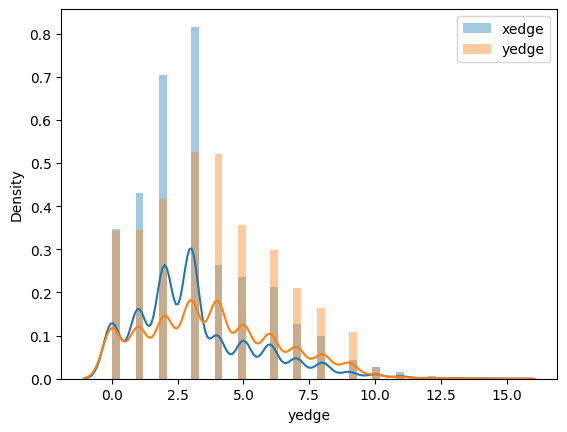

In [28]:
sns.distplot(df['xedge'],label='xedge')
sns.distplot(df['yedge'],label='yedge')
plt.legend()

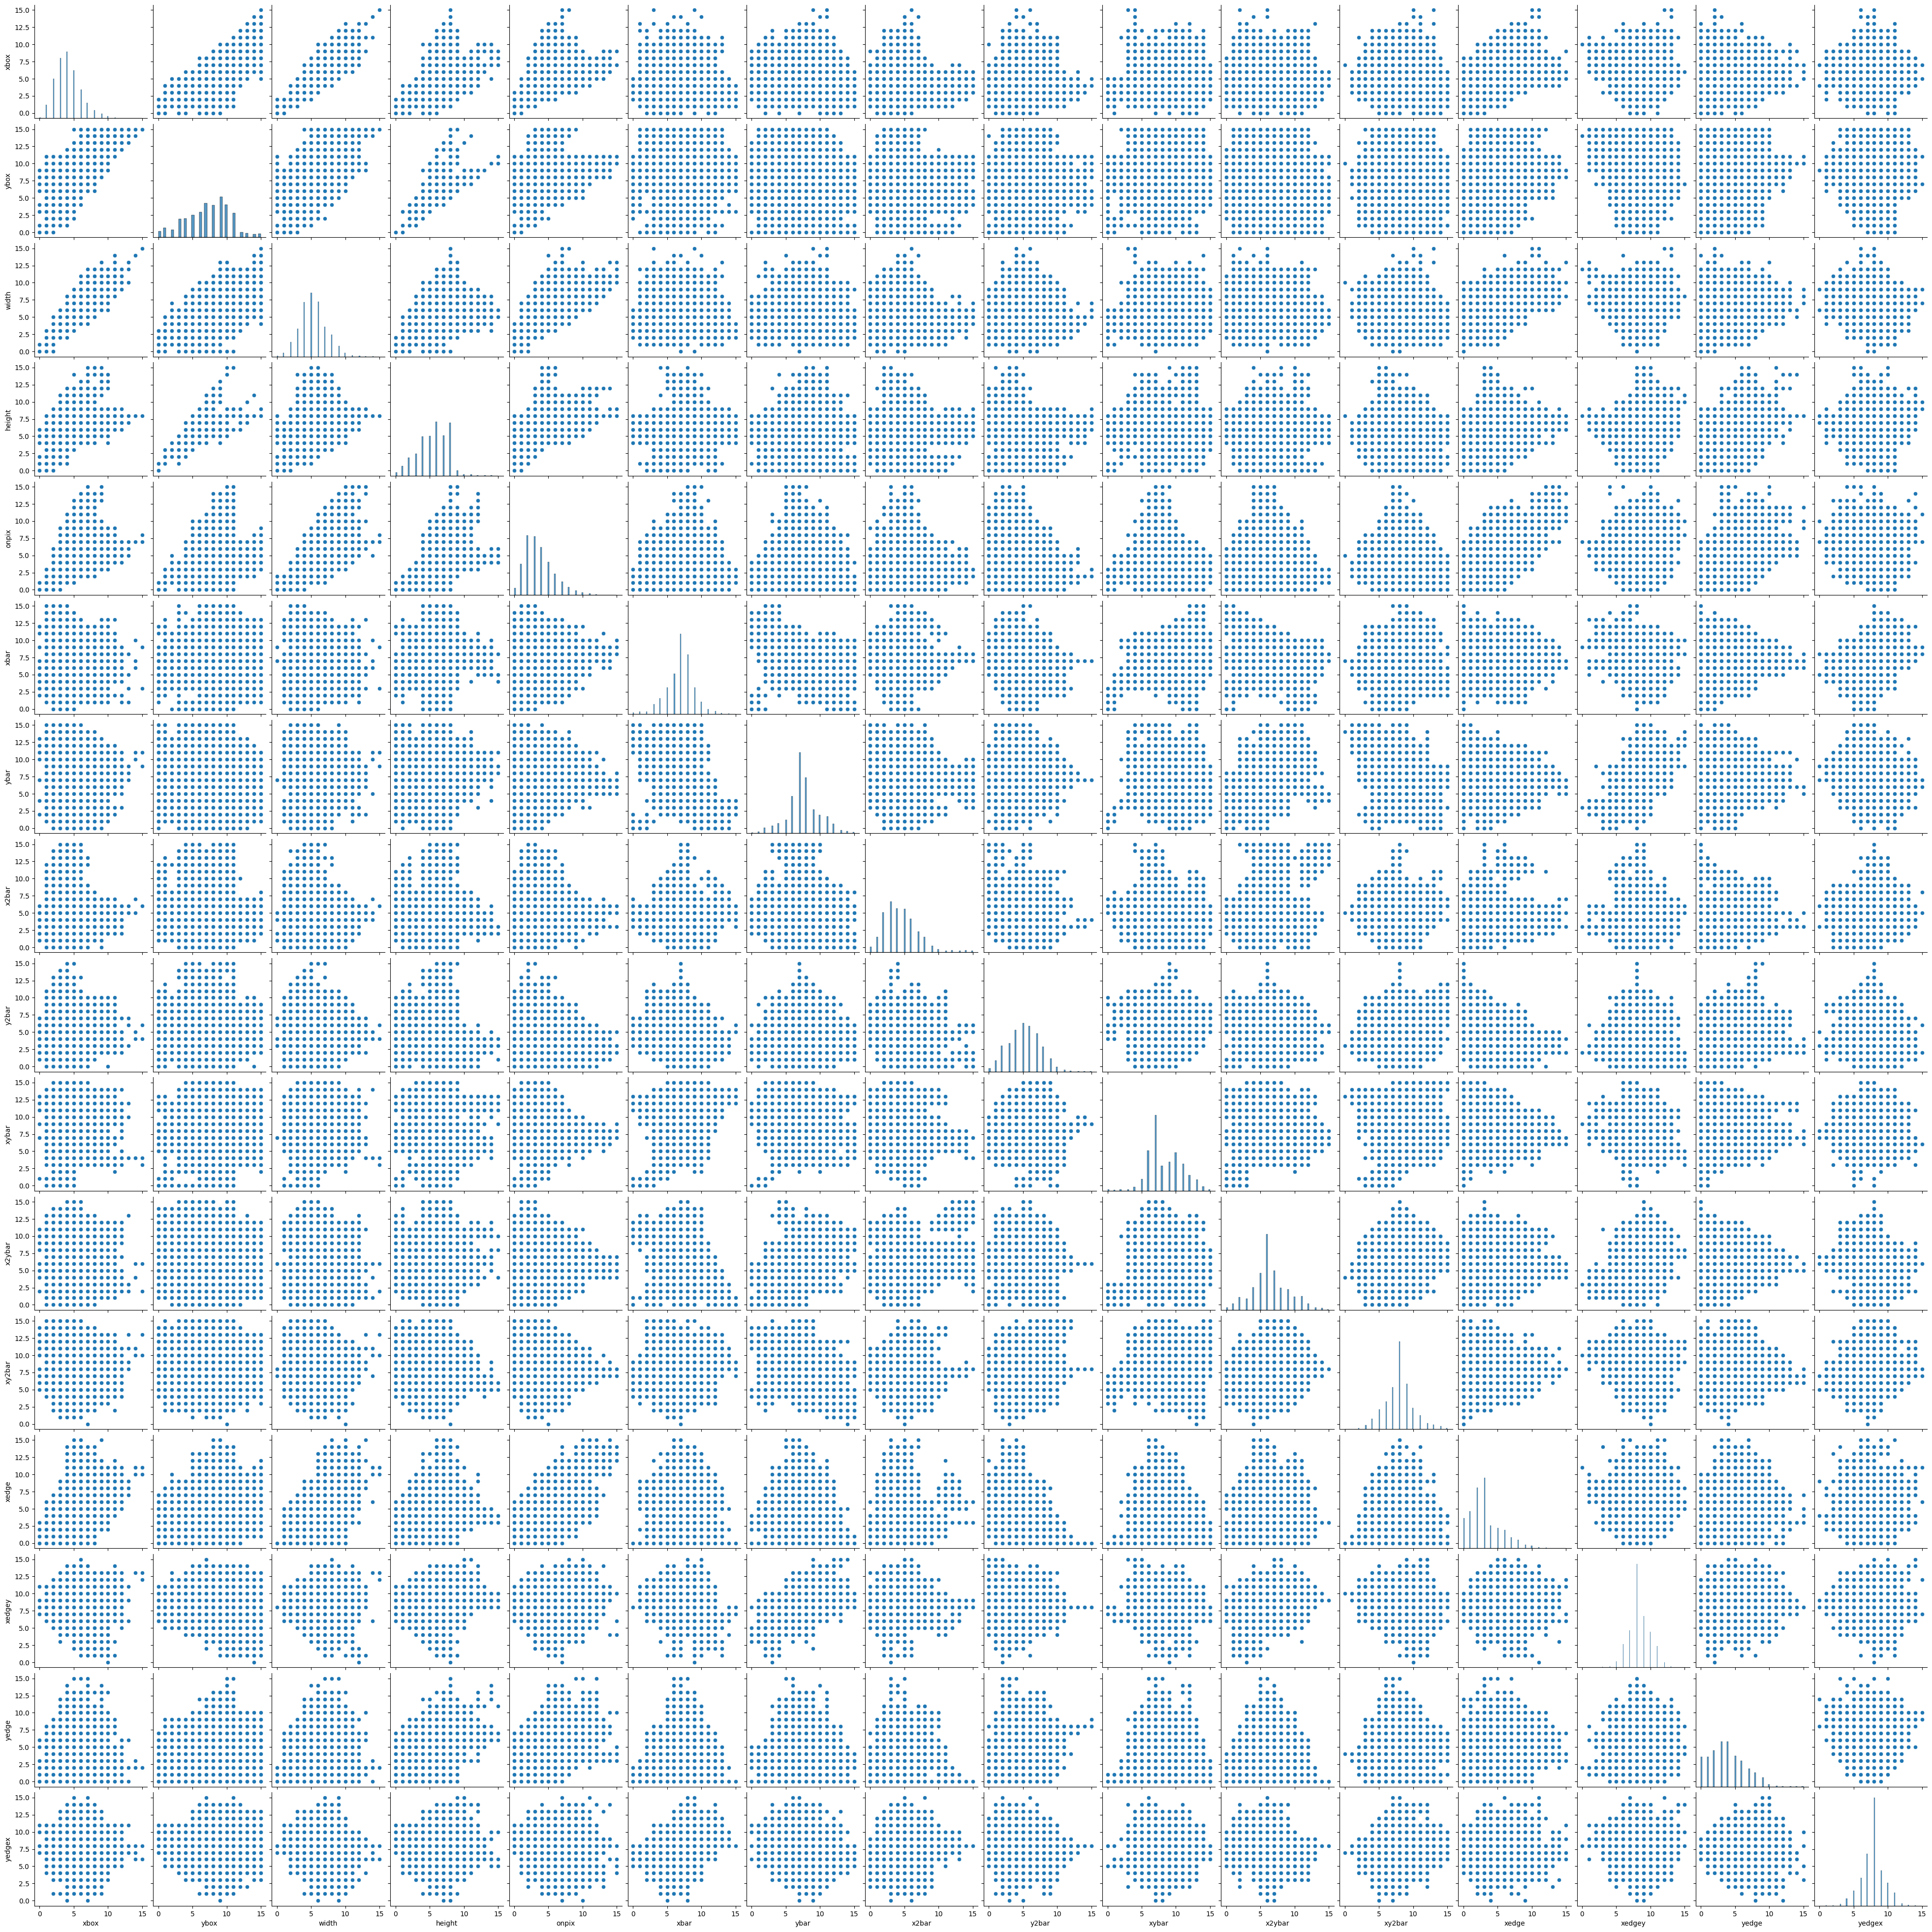

In [29]:
sns.pairplot(df)

<Axes: >

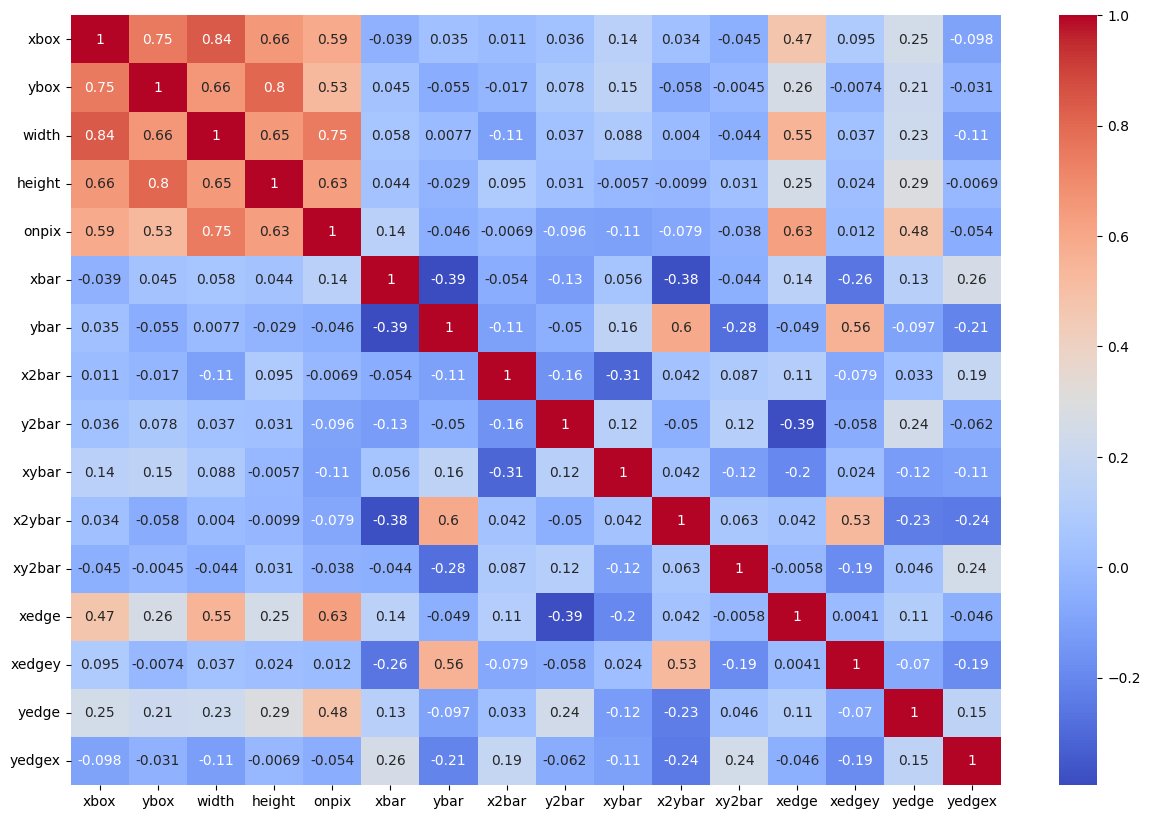

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('letter',axis=1).corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='letter', ylabel='Count'>

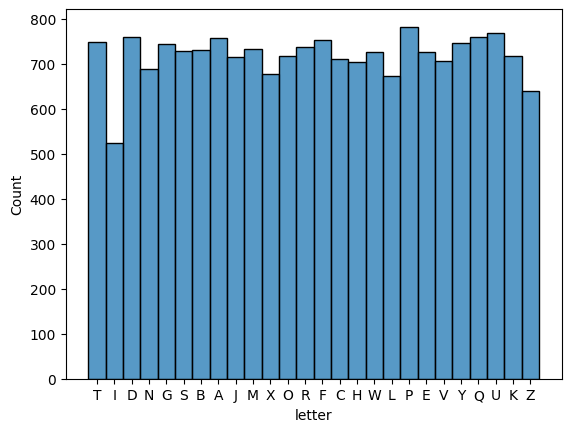

In [31]:
sns.histplot(target,bins=23)

<Axes: >

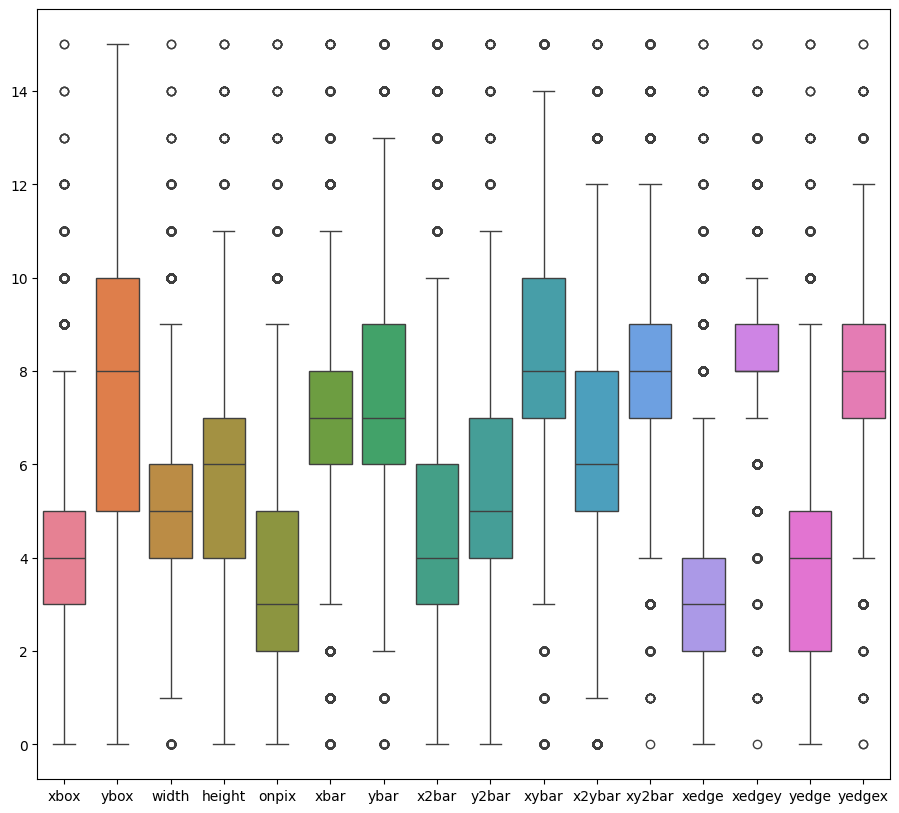

In [32]:
plt.figure(figsize=(11,10))
sns.boxplot(feature)

In [33]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([19,  8,  3, ...,  2, 19,  0])

In [34]:
target = target.astype(int)

In [35]:
x_train,x_test,y_train,y_test= train_test_split(feature,target,train_size=0.7,random_state=50)

In [36]:
y_train= keras.utils.to_categorical(y_train)
y_test= keras.utils.to_categorical(y_test)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13067, 16)
(5601, 16)
(13067, 26)
(5601, 26)


In [38]:
epochs=10
batch_size=100
n_classes=26

In [39]:
 model= Sequential()
 model.add(Dense(14,activation='relu',kernel_initializer='uniform',input_shape=(16,)))
 model.add(Dense(12,activation='relu',kernel_initializer='uniform'))
 model.add(Dense(n_classes,activation='softmax',kernel_initializer='uniform'))
 model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics='accuracy')


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                238       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 26)                338       
                                                                 
Total params: 756
Trainable params: 756
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
131/131 [==============================] - 2s 7ms/step - loss: 3.1498 - accuracy: 0.0728 - val_loss: 2.8352 - val_accuracy: 0.1680
Epoch 2/10
131/131 [==============================] - 0s 4ms/step - loss: 2.6618 - accuracy: 0.1545 - val_loss: 2.5594 - val_accuracy: 0.1691
Epoch 3/10
131/131 [==============================] - 1s 4ms/step - loss: 2.4467 - accuracy: 0.2349 - val_loss: 2.3514 - val_accuracy: 0.2744
Epoch 4/10
131/131 [==============================] - 0s 3ms/step - loss: 2.2604 - accuracy: 0.2833 - val_loss: 2.2183 - val_accuracy: 0.2737
Epoch 5/10
131/131 [==============================] - 1s 4ms/step - loss: 2.1471 - accuracy: 0.3172 - val_loss: 2.1299 - val_accuracy: 0.3171
Epoch 6/10
131/131 [==============================] - 1s 4ms/step - loss: 2.0797 - accuracy: 0.3373 - val_loss: 2.0870 - val_accuracy: 0.3249
Epoch 7/10
131/131 [==============================] - 0s 4ms/step - loss: 2.0303 - accuracy: 0.3565 - val_loss: 2.0375 - val_accuracy: 0.3646
Epoch 

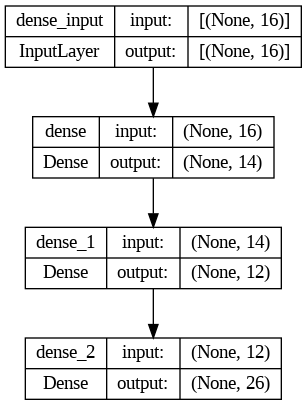

In [42]:
plot_model(model,show_shapes=True)

In [43]:
y_pred=model.predict(x_test)
y_pred

176/176 [==============================] - 1s 4ms/step


array([[1.05932697e-04, 1.21700905e-01, 7.54419863e-02, ...,
        1.58710018e-01, 1.04791892e-03, 1.00750349e-01],
       [4.29661350e-06, 2.26389855e-01, 6.34672120e-02, ...,
        8.08677375e-02, 2.40118286e-04, 9.36784819e-02],
       [5.01169310e-08, 1.48069242e-03, 6.07504589e-05, ...,
        2.22072424e-03, 3.38831604e-01, 8.93057768e-06],
       ...,
       [2.68622825e-04, 1.41025022e-01, 4.79681641e-02, ...,
        1.36530250e-01, 2.73393523e-02, 5.12321107e-03],
       [1.16878888e-04, 2.31554229e-02, 4.30772128e-03, ...,
        1.80082582e-02, 7.73023143e-02, 2.39796009e-05],
       [9.68454970e-08, 7.61465202e-08, 1.46016417e-08, ...,
        4.06082989e-08, 4.18769159e-05, 6.61097750e-13]], dtype=float32)

In [44]:
act=[]
for i in range(len(y_test)):
  act.append(np.argmax(y_test[i]))
print(act)

[11, 1, 19, 6, 21, 22, 21, 2, 18, 25, 16, 0, 14, 18, 16, 25, 25, 7, 25, 18, 14, 14, 24, 18, 4, 16, 3, 3, 5, 12, 0, 3, 6, 3, 20, 9, 7, 8, 14, 24, 17, 15, 21, 7, 15, 6, 5, 24, 4, 0, 0, 6, 1, 21, 20, 20, 1, 12, 2, 22, 21, 7, 3, 20, 10, 24, 7, 20, 0, 0, 1, 3, 7, 6, 24, 24, 25, 10, 14, 24, 21, 10, 6, 16, 3, 13, 0, 17, 8, 15, 11, 17, 3, 14, 20, 16, 20, 4, 3, 11, 18, 4, 7, 4, 6, 2, 20, 16, 8, 15, 3, 6, 7, 6, 7, 21, 15, 18, 1, 4, 6, 24, 13, 17, 25, 24, 9, 7, 20, 1, 14, 18, 3, 24, 21, 12, 3, 3, 25, 18, 15, 3, 7, 4, 25, 22, 2, 16, 22, 23, 19, 24, 16, 13, 14, 2, 7, 18, 24, 1, 11, 9, 7, 13, 24, 0, 15, 16, 4, 18, 24, 2, 15, 12, 18, 4, 8, 25, 3, 1, 14, 18, 4, 24, 10, 10, 8, 6, 25, 20, 13, 14, 24, 19, 13, 7, 4, 14, 7, 24, 19, 13, 14, 15, 8, 11, 7, 12, 5, 13, 23, 13, 13, 22, 9, 9, 20, 16, 19, 19, 24, 14, 21, 24, 17, 4, 8, 19, 9, 24, 1, 16, 18, 3, 3, 13, 20, 23, 4, 12, 8, 13, 11, 10, 9, 25, 13, 18, 7, 17, 19, 20, 12, 25, 24, 17, 3, 13, 16, 4, 21, 4, 11, 23, 11, 23, 19, 0, 14, 14, 2, 21, 0, 15, 13, 1, 2

In [45]:
pred=[]
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
print(pred)

[18, 1, 24, 16, 21, 22, 21, 11, 9, 5, 16, 0, 1, 0, 14, 25, 25, 7, 25, 18, 17, 16, 5, 8, 25, 17, 15, 7, 24, 12, 0, 15, 5, 1, 20, 9, 16, 8, 16, 15, 3, 19, 21, 17, 15, 17, 5, 24, 2, 0, 0, 11, 18, 21, 20, 13, 1, 12, 1, 22, 21, 17, 7, 20, 3, 24, 17, 20, 0, 0, 3, 20, 7, 2, 24, 19, 25, 0, 14, 15, 21, 0, 1, 16, 16, 12, 0, 17, 8, 5, 17, 7, 7, 7, 7, 3, 20, 11, 10, 7, 9, 8, 17, 4, 17, 1, 3, 16, 8, 15, 17, 2, 7, 16, 14, 24, 15, 25, 17, 23, 2, 24, 12, 1, 25, 24, 9, 7, 20, 17, 12, 23, 0, 24, 21, 22, 17, 2, 25, 18, 5, 1, 7, 1, 25, 12, 23, 2, 12, 5, 24, 24, 23, 13, 16, 18, 7, 25, 24, 1, 23, 8, 7, 22, 24, 0, 15, 16, 9, 25, 21, 23, 24, 12, 1, 8, 5, 25, 3, 1, 17, 18, 11, 19, 10, 16, 8, 7, 18, 15, 7, 12, 24, 24, 13, 17, 5, 7, 7, 21, 24, 13, 17, 24, 8, 11, 10, 12, 5, 13, 9, 12, 13, 12, 0, 0, 20, 2, 5, 24, 24, 14, 21, 21, 0, 18, 8, 24, 9, 12, 1, 16, 18, 9, 15, 13, 7, 23, 16, 12, 5, 22, 11, 2, 8, 25, 21, 10, 7, 0, 5, 3, 12, 25, 5, 3, 17, 7, 11, 16, 24, 11, 11, 17, 11, 23, 24, 0, 17, 16, 23, 24, 0, 15, 22, 1,

In [46]:
accuracy_score(act,pred)

0.3949294768791287

In [1]:
pip install tensorflow==2.12.0

In [2]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [3]:
def create_model():
    model = Sequential()
    model.add(Dense(14, activation='relu', kernel_initializer='uniform', input_shape=(16,)))
    model.add(Dense(12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer='uniform'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
model = KerasClassifier(build_fn=create_model)

<ipython-input-4-d5ce3444c54d>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


In [5]:
param_grid = {'batch_size': [50,60,70,80,100,],'epochs': [5,10, 20,25,30]}

In [8]:
from sklearn.model_selection import GridSearchCV
grid_fit = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)

In [47]:
grid_fit.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Epoch 1/5
210/210 [==============================] - 1s 1ms/step - loss: 3.1024 - accuracy: 0.0776
Epoch 2/5
210/210 [==============================] - 0s 2ms/step - loss: 2.7259 - accuracy: 0.1640
Epoch 3/5
210/210 [==============================] - 0s 2ms/step - loss: 2.4494 - accuracy: 0.2539
Epoch 4/5
210/210 [==============================] - 0s 2ms/step - loss: 2.2634 - accuracy: 0.3009
Epoch 5/5
53/53 [==============================] - 0s 1ms/step - loss: 2.1322 - accuracy: 0.3638
[CV] END ............................batch_size=50, epochs=5; total time=   2.7s
Epoch 1/5
210/210 [==============================] - 1s 1ms/step - loss: 3.1011 - accuracy: 0.0762
Epoch 2/5
210/210 [==============================] - 0s 2ms/step - loss: 2.7905 - accuracy: 0.1334
Epoch 3/5
210/210 [==============================] - 0s 2ms/step - loss: 2.6654 - accuracy: 0.2017
Epoch 4/5
210/210 [==============================] - 0s 2ms/step - 

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7c72caf76050>,
             param_grid={'batch_size': [50, 60, 70, 80, 100],
                         'epochs': [5, 10, 20, 25, 30]},
             verbose=2)

In [51]:
grid_fit.best_params_

{'batch_size': 50, 'epochs': 30}

In [ ]:
!pip install keras==2.3.0

In [52]:
from tensorflow.python.keras.engine import data_adapter

In [53]:
epochs_1=30
batch_size_1=50
n_classes=26

In [54]:
 model_1= Sequential()
 model_1.add(Dense(14,activation='relu',kernel_initializer='uniform',input_shape=(16,)))
 model_1.add(Dense(12,activation='relu',kernel_initializer='uniform'))
 model_1.add(Dense(n_classes,activation='softmax',kernel_initializer='uniform'))
 model_1.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics='accuracy')

In [55]:
model_1.summary()

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_381 (Dense)           (None, 14)                238       
                                                                 
 dense_382 (Dense)           (None, 12)                180       
                                                                 
 dense_383 (Dense)           (None, 26)                338       
                                                                 
Total params: 756
Trainable params: 756
Non-trainable params: 0
_________________________________________________________________


In [56]:
 model_1.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics='accuracy')

In [57]:
history1=model_1.fit(x_train,y_train,epochs=epochs_1,batch_size=batch_size_1,validation_data=(x_test,y_test))

Epoch 1/30
262/262 [==============================] - 2s 4ms/step - loss: 2.8679 - accuracy: 0.1657 - val_loss: 2.3315 - val_accuracy: 0.2742
Epoch 2/30
262/262 [==============================] - 1s 4ms/step - loss: 2.1411 - accuracy: 0.3408 - val_loss: 2.0513 - val_accuracy: 0.3789
Epoch 3/30
262/262 [==============================] - 1s 2ms/step - loss: 1.9430 - accuracy: 0.3888 - val_loss: 1.8970 - val_accuracy: 0.4153
Epoch 4/30
262/262 [==============================] - 1s 2ms/step - loss: 1.8427 - accuracy: 0.4208 - val_loss: 1.8364 - val_accuracy: 0.4265
Epoch 5/30
262/262 [==============================] - 1s 3ms/step - loss: 1.7858 - accuracy: 0.4328 - val_loss: 1.7954 - val_accuracy: 0.4496
Epoch 6/30
262/262 [==============================] - 1s 3ms/step - loss: 1.7500 - accuracy: 0.4480 - val_loss: 1.7496 - val_accuracy: 0.4580
Epoch 7/30
262/262 [==============================] - 1s 3ms/step - loss: 1.7227 - accuracy: 0.4541 - val_loss: 1.7187 - val_accuracy: 0.4499
Epoch 

In [58]:
y_pred_1=model_1.predict(x_test)

176/176 [==============================] - 0s 1ms/step


In [62]:
y_pred_1

array([[7.96210137e-04, 4.40742560e-02, 7.26968097e-03, ...,
        1.22169461e-02, 1.30310990e-02, 3.32964733e-02],
       [9.46783803e-06, 5.52129626e-01, 4.02359903e-04, ...,
        1.21854409e-03, 1.98548951e-05, 1.02378819e-02],
       [2.34294517e-09, 2.34368308e-05, 3.00928688e-04, ...,
        6.51351037e-03, 2.55416542e-01, 4.22752373e-06],
       ...,
       [9.83662394e-05, 2.87699588e-02, 1.58461362e-01, ...,
        5.86600229e-02, 1.39882654e-01, 1.28330132e-02],
       [4.01595770e-07, 1.29153114e-02, 1.47618482e-06, ...,
        3.19990213e-05, 4.58429531e-05, 2.97271754e-07],
       [1.56983347e-07, 1.44361875e-05, 2.51856600e-05, ...,
        1.21487701e-05, 6.36602854e-05, 7.41986295e-09]], dtype=float32)